## Download Audit Opinion set from Audit Analytics data from WRDS

-------------------------

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import wrds
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=200

-------------

### Connect WRDS

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


### Get variable list

In [3]:
conn.list_tables(library='audit')

['accfiler',
 'auditcblock',
 'auditchange',
 'auditfees',
 'auditfeesr',
 'auditlegal',
 'auditnonreli',
 'auditopin',
 'auditordur',
 'auditors',
 'auditorsinfo',
 'auditsox302',
 'auditsox404',
 'bankrupt',
 'bdfrep',
 'benefit',
 'commlett',
 'commlettconv',
 'commlettthreads',
 'currengbdfrep',
 'currengnpsaud',
 'diroffichange',
 'f01audaff',
 'f01audeve',
 'f01audevetoaud',
 'f01audevetyp',
 'f01audloc',
 'f01secloc',
 'f05audopitogoiconiss',
 'f05goiconiss',
 'f06forapdiv',
 'f06forapfil',
 'f06forapnotdiv',
 'f18meracq',
 'f18meracqfil',
 'f18meracqtratyp',
 'f27aud',
 'f27corpos',
 'f27docdet',
 'f27docdetfil',
 'f27per',
 'f27perfil',
 'f27perpos',
 'f27secloc',
 'f28aud',
 'f28foucod',
 'f28ntecod',
 'f28ntecomcod',
 'f28subclacod',
 'f29aud',
 'f29corpos',
 'f29docdet',
 'f29docdetfil',
 'f29per',
 'f29perfil',
 'f29perpos',
 'f29secloc',
 'f30aud',
 'f30foucod',
 'f30ntecod',
 'f30ntecomcod',
 'f30subclacod',
 'f34audopitogoiconiss',
 'f34forapdiv',
 'f34forapfil',
 'f34f

In [4]:
vars_bankrupt= conn.describe_table(library='audit', table='bankrupt')['name']
print(len(vars_bankrupt))

Approximately 2963 rows in audit.bankrupt.
217


In [5]:
for idx, var in enumerate(vars_bankrupt):
    print(idx, var)

0 bank_key
1 subsid_name
2 bankruptcy_type
3 law_court_fkey
4 court_type_code
5 court_name
6 court_s_name
7 court_loc_street
8 court_loc_city
9 court_loc_state
10 court_loc_zip
11 court_loc
12 court_url
13 law_court_state_name
14 law_court_country
15 law_court_reg
16 law_court_con_super_reg
17 bank_begin_date
18 bank_end_date
19 ftp_file_fkey
20 form_fkey
21 file_date
22 file_accepted
23 file_size
24 http_name_html
25 http_name_text
26 company_fkey
27 best_edgar_ticker
28 matchqu_price_date
29 matchqu_price_close
30 matchqu_tso_date
31 matchqu_tso
32 matchqu_tso_markcap
33 matchqu_date_qtr
34 matchqu_date_ttm
35 matchqu_filing_code_qtr
36 matchqu_filing_code_ttm
37 matchqu_annual_quindic
38 matchqu_balsh_book_val
39 matchqu_balsh_assets
40 matchqu_balsh_cash_equivs
41 matchqu_incmst_rev_qtr
42 matchqu_incmst_rev_ttm
43 matchqu_incmst_netinc_qtr
44 matchqu_incmst_netinc_ttm
45 matchqu_incmst_extraitm_qtr
46 matchqu_incmst_extraitm_ttm
47 matchqu_incmst_ebitda_qtr
48 matchqu_incmst_ebitd

### Select variables to download

In [6]:
vars_to_skip= ['matchfy', 'matchqu', 'closestfy', 'closestqu', 'priorqu', 'priorfy', 'note', 'opinion_text']
vars_to_keep=[]
for idx, var in enumerate(vars_bankrupt):
    if any(var_to_skip in var for var_to_skip in vars_to_skip):
        pass
    else:        
        print(idx, var)
        vars_to_keep.append(var)

0 bank_key
1 subsid_name
2 bankruptcy_type
3 law_court_fkey
4 court_type_code
5 court_name
6 court_s_name
7 court_loc_street
8 court_loc_city
9 court_loc_state
10 court_loc_zip
11 court_loc
12 court_url
13 law_court_state_name
14 law_court_country
15 law_court_reg
16 law_court_con_super_reg
17 bank_begin_date
18 bank_end_date
19 ftp_file_fkey
20 form_fkey
21 file_date
22 file_accepted
23 file_size
24 http_name_html
25 http_name_text
26 company_fkey
27 best_edgar_ticker
215 eventdate_aud_fkey
216 eventdate_aud_name


In [7]:
vars_to_keep= ['bank_key', 'bankruptcy_type', 'company_fkey', 'best_edgar_ticker', 'bank_begin_date', 'bank_end_date', 'form_fkey', 'file_date', 'eventdate_aud_fkey', 'eventdate_aud_name']

### Pilot check

In [8]:
df_test= conn.get_table(library= 'audit', table='bankrupt',
                       columns= vars_to_keep,
                       obs= 3)
df_test

,bank_key,bankruptcy_type,company_fkey,best_edgar_ticker,bank_begin_date,bank_end_date,form_fkey,file_date,eventdate_aud_fkey,eventdate_aud_name
0,2863.0,11.0,0000002034,None,2019-02-19,None,8-K,2019-09-20,11761.0,BDO USA LLP
1,2740.0,11.0,0000002178,AE,2017-04-21,2018-10-19,8-K,2017-04-24,3.0,Deloitte & Touche LLP
2,265.0,11.0,0000002852,None,2002-10-01,2013-01-09,8-K,2002-10-15,1.0,PricewaterhouseCoopers LLP


### Download all observations

In [9]:
df= conn.get_table(library= 'audit', table='bankrupt',
                       columns= vars_to_keep)
print(df.shape)
df.head()

(2963, 10)


,bank_key,bankruptcy_type,company_fkey,best_edgar_ticker,bank_begin_date,bank_end_date,form_fkey,file_date,eventdate_aud_fkey,eventdate_aud_name
0,2863.0,11.0,0000002034,None,2019-02-19,None,8-K,2019-09-20,11761.0,BDO USA LLP
1,2740.0,11.0,0000002178,AE,2017-04-21,2018-10-19,8-K,2017-04-24,3.0,Deloitte & Touche LLP
2,265.0,11.0,0000002852,None,2002-10-01,2013-01-09,8-K,2002-10-15,1.0,PricewaterhouseCoopers LLP
3,2906.0,11.0,0000003116,None,2020-05-20,2021-02-19,8-K,2020-05-21,11761.0,BDO USA LLP
4,499.0,11.0,0000003662,None,2001-02-06,2006-07-31,8-K,2001-02-20,3.0,Deloitte & Touche LLP


In [10]:
df.rename(columns=
         {'eventdate_aud_fkey':'afk',
         'eventdate_aud_name':'afn',
         'company_fkey':'cik',
         'best_edgar_ticker':'tic'}, 
          inplace= True)
df.head()

,bank_key,bankruptcy_type,cik,tic,bank_begin_date,bank_end_date,form_fkey,file_date,afk,afn
0,2863.0,11.0,0000002034,None,2019-02-19,None,8-K,2019-09-20,11761.0,BDO USA LLP
1,2740.0,11.0,0000002178,AE,2017-04-21,2018-10-19,8-K,2017-04-24,3.0,Deloitte & Touche LLP
2,265.0,11.0,0000002852,None,2002-10-01,2013-01-09,8-K,2002-10-15,1.0,PricewaterhouseCoopers LLP
3,2906.0,11.0,0000003116,None,2020-05-20,2021-02-19,8-K,2020-05-21,11761.0,BDO USA LLP
4,499.0,11.0,0000003662,None,2001-02-06,2006-07-31,8-K,2001-02-20,3.0,Deloitte & Touche LLP


In [11]:
df[['bank_key', 'bankruptcy_type', 'afk']]= df[['bank_key', 'bankruptcy_type', 'afk']].astype('int')
df['big4']= 0
df.loc[df.afk <=4, 'big4']= 1

In [12]:
df.head()

,bank_key,bankruptcy_type,cik,tic,bank_begin_date,bank_end_date,form_fkey,file_date,afk,afn,big4
0,2863,11,0000002034,None,2019-02-19,None,8-K,2019-09-20,11761,BDO USA LLP,0
1,2740,11,0000002178,AE,2017-04-21,2018-10-19,8-K,2017-04-24,3,Deloitte & Touche LLP,1
2,265,11,0000002852,None,2002-10-01,2013-01-09,8-K,2002-10-15,1,PricewaterhouseCoopers LLP,1
3,2906,11,0000003116,None,2020-05-20,2021-02-19,8-K,2020-05-21,11761,BDO USA LLP,0
4,499,11,0000003662,None,2001-02-06,2006-07-31,8-K,2001-02-20,3,Deloitte & Touche LLP,1


In [13]:
df.dtypes

bank_key            int32
bankruptcy_type     int32
cik                object
tic                object
bank_begin_date    object
bank_end_date      object
form_fkey          object
file_date          object
afk                 int32
afn                object
big4                int64
dtype: object

In [14]:
df['bank_begin_date'][0].year

2019

In [15]:
df['bank_begin_year']= df['bank_begin_date'].astype('datetime64').dt.year

In [16]:
df.head()

,bank_key,bankruptcy_type,cik,tic,bank_begin_date,bank_end_date,form_fkey,file_date,afk,afn,big4,bank_begin_year
0,2863,11,0000002034,None,2019-02-19,None,8-K,2019-09-20,11761,BDO USA LLP,0,2019
1,2740,11,0000002178,AE,2017-04-21,2018-10-19,8-K,2017-04-24,3,Deloitte & Touche LLP,1,2017
2,265,11,0000002852,None,2002-10-01,2013-01-09,8-K,2002-10-15,1,PricewaterhouseCoopers LLP,1,2002
3,2906,11,0000003116,None,2020-05-20,2021-02-19,8-K,2020-05-21,11761,BDO USA LLP,0,2020
4,499,11,0000003662,None,2001-02-06,2006-07-31,8-K,2001-02-20,3,Deloitte & Touche LLP,1,2001


---------------------

## Check data with visualization

In [17]:
df.form_fkey.value_counts().sort_index()

10-K          4
10-K405       3
10-Q          5
10KSB         1
10QSB         6
6-K          16
8-K        2036
8-K/A         7
Docket      882
NT 10-Q       2
Name: form_fkey, dtype: int64

In [18]:
df.bankruptcy_type.value_counts().sort_index()

0        1
7      596
11    2357
15       9
Name: bankruptcy_type, dtype: int64

In [20]:
df=df[(df.bank_begin_year >= 2000) & (df.bank_begin_year <= 2021)]

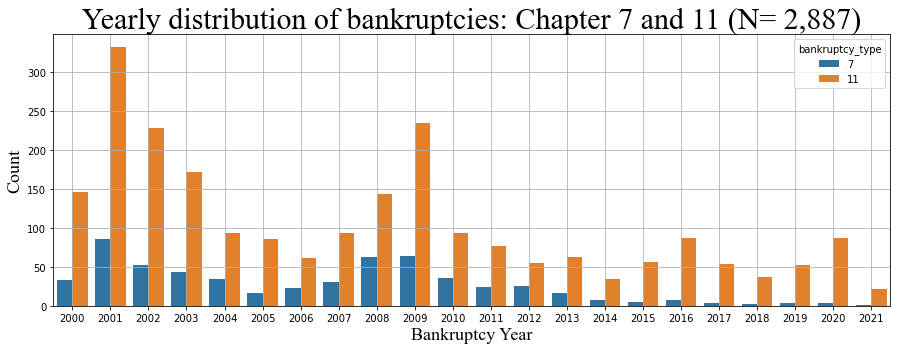

In [34]:
fig= plt.figure(figsize=(15,5))

df_for_fig= df[df.bankruptcy_type.isin([7,11])]

sns.countplot(data= df_for_fig, x='bank_begin_year', hue= 'bankruptcy_type')
plt.xticks(rotation=0)
plt.title(f"Yearly distribution of bankruptcies: Chapter 7 and 11 (N= {df_for_fig.shape[0]:,})", fontsize= 30, fontname='Times New Roman')
plt.xlabel('Bankruptcy Year', fontname='Times New Roman', fontsize=18)
plt.ylabel('Count', fontname='Times New Roman', fontsize=18)
plt.grid()
plt.show()

In [35]:
fig.savefig('../assets/images/bankruptcy-dist.jpg')

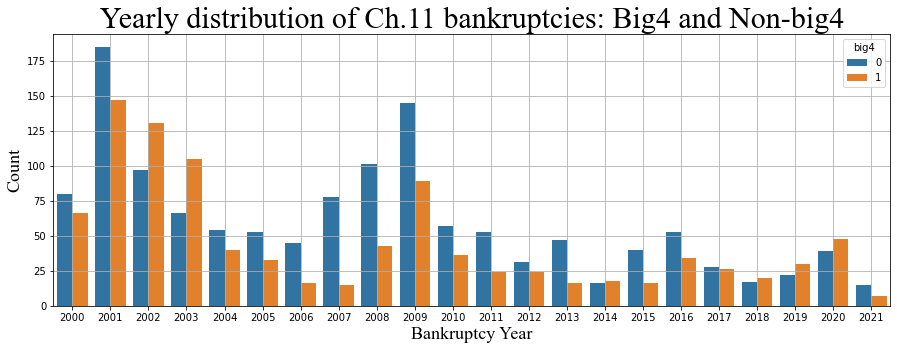

In [27]:
fig= plt.figure(figsize=(15,5))
sns.countplot(data=df[df.bankruptcy_type.isin([11])], x='bank_begin_year', hue= 'big4')
plt.xticks(rotation=0)
plt.title("Yearly distribution of Ch.11 bankruptcies: Big4 and Non-big4", fontsize= 30, fontname='Times New Roman')
plt.xlabel('Bankruptcy Year', fontname='Times New Roman', fontsize=18)
plt.ylabel('Count', fontname='Times New Roman', fontsize=18)
plt.grid()
plt.show()

--------------------

### Save data

In [24]:
df.to_csv('data/aa_bankrupt.csv', index= False)
df.head()

,bank_key,bankruptcy_type,cik,tic,bank_begin_date,bank_end_date,form_fkey,file_date,afk,afn,big4,bank_begin_year
0,2863,11,0000002034,None,2019-02-19,None,8-K,2019-09-20,11761,BDO USA LLP,0,2019
1,2740,11,0000002178,AE,2017-04-21,2018-10-19,8-K,2017-04-24,3,Deloitte & Touche LLP,1,2017
2,265,11,0000002852,None,2002-10-01,2013-01-09,8-K,2002-10-15,1,PricewaterhouseCoopers LLP,1,2002
3,2906,11,0000003116,None,2020-05-20,2021-02-19,8-K,2020-05-21,11761,BDO USA LLP,0,2020
4,499,11,0000003662,None,2001-02-06,2006-07-31,8-K,2001-02-20,3,Deloitte & Touche LLP,1,2001


### Close connection

In [25]:
conn.close()

-------------